In [140]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from models.model import BiSeNet
from torchvision import transforms
from PIL import Image
import os
import torch
%matplotlib inline

In [141]:
table = {'left_eye': 1,
         'right_eye': 2,
         'upper_lip': 3,
         'lower_lip': 4,
         'mouth': 5,
         'left_iris': 6,
         'right_iris': 7,
         'left_pupil': 8,
         'right_pupil': 9}

In [155]:
iris = np.array([[[0, 70, 255]]])
lips = np.array([[[255, 79, 140]]])
iris = np.array([[[0, 250, 154]]])
mouth = np.array([[[0, 0, 0]]])
try_color_01 = np.array([[[60, 179, 113]]])
try_color_02 = np.array([[[0, 100, 0]]])
background_01 = np.array([[[0, 0, 0]]])
background_02 = np.array([[[255, 218, 185]]])
background_03 = np.array([[[255, 160, 122]]])
background_04 = np.array([[[255, 222, 173]]])
background_05 = np.array([[[232, 131, 7]]])
background_06 = np.array([[[232, 149, 7]]])

In [156]:
def show_color(color_array):
    plt.imshow(color_array)

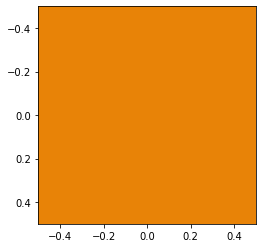

In [157]:
show_color(background_05)

In [158]:
def get_parsing(device, n_classes, image_path, net):
    net.eval()

    to_tensor = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),
                                                         (0.229, 0.224, 0.225))])

    with torch.no_grad():
        img = Image.open(image_path)
        image = img.resize((1024, 1024), Image.BILINEAR)
        img = to_tensor(image)
        img = torch.unsqueeze(img, 0)
        img = img.to(device)
        out = net(img)[0]
        parsing = out.squeeze(0).cpu().numpy().argmax(0)
        return parsing.astype(np.uint8)


In [159]:
def parsing2color(iris, lips, background):
    net = BiSeNet(n_classes=10)
    net.load_state_dict(torch.load("../outputs/2022_01_11_15_42_40/final.pth", map_location="cpu"))
    img_name = "../datas/one_IMG_0392_imgs_rate_30/one_IMG_0392_rate_30_00081.png"
    parsing = get_parsing("cpu", 10, img_name, net)
#    final_img = np.zeros((1024, 1024, 3))
    final_img = np.zeros((1024, 1024, 3))
    final_img[..., :] = background
    for h in range(1024):
        for w in range(1024):
            if parsing[h, w] == table["left_eye"] or parsing[h, w] == table["right_eye"]:
                final_img[h, w, :] = 255
            elif parsing[h, w] == table["upper_lip"] or parsing[h, w] == table["lower_lip"]:
                final_img[h, w, 0] = lips[0, 0, 0]
                final_img[h, w, 1] = lips[0, 0, 1]
                final_img[h, w, 2] = lips[0, 0, 2]
            elif parsing[h, w] == table["left_iris"] or parsing[h, w] == table["right_iris"]:
                final_img[h, w, 0] = iris[0, 0, 0]
                final_img[h, w, 1] = iris[0, 0, 1]
                final_img[h, w, 2] = iris[0, 0, 2]
            elif parsing[h, w] == table["left_pupil"] or parsing[h, w] == table["right_pupil"]:
                final_img[h, w, :] = 255
            elif parsing[h, w] == table["mouth"]:
                final_img[h, w, :] = 0
            else:
                pass

#    plt.imshow(cv2.cvtColor(final_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
    plt.imshow(final_img.astype(np.uint8))

In [ ]:
parsing2color(mouth, lips, background_06)